# PIMA Diabetes Database Analysis

In this Jupyter Notebook, I perform several analyses of the PIMA diabetes dataset sourced from Kaggle. The dataset contains various health-related attributes of PIMA Native American women, along with a binary target indicating diabetes occurrence. My analysis encompasses Exploratory Data Analysis (EDA) to gain insights into the data distribution, patterns, and correlations.
Sections:

    Data Exploration: I examine the dataset's structure, summary statistics, and visualize key features to understand their distributions and relationships.

    Logistic Regression: Utilizing the insights gained from EDA, I construct a logistic regression model to predict the likelihood of diabetes occurrence based on the provided attributes.

    Support Vector Machine (SVM): In addition to logistic regression, I implement a Support Vector Machine (SVM) model, exploring its efficacy in classifying diabetes cases.

    Grid Search for Model Optimization: The final part of the notebook involves a grid search to find the best-fit parameters for the SVM model. While this process shows a marginal increase in predictive power for the SVM, it suggests that further feature generation might be necessary to enhance model performance.

Throughout this notebook, I aim to not only analyze the dataset but also demonstrate proficiency in implementing common machine learning algorithms for predictive modeling.

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from   plotly.subplots import make_subplots

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


In this section, I embark on the crucial step of Exploratory Data Analysis (EDA) to gain insights into the PIMA diabetes dataset.

    Data Import and Inspection: I begin by importing the dataset and inspecting its structure using .head() and .dtypes methods. This initial exploration reveals that some columns are of object type, necessitating conversion to numerical types for analysis.

    Handling Missing Values: Upon closer inspection, I identify that several measures contain 0s, which is implausible for certain health metrics such as blood pressure. To address this issue, I first convert these 0s to NaNs, allowing for more accurate analysis.

    Imputing Missing Values: With missing values flagged, I explore potential imputation strategies. Using graphs of scaled data, I assess the distribution of features and determine whether imputation with medians or means is more appropriate. This decision is crucial for maintaining the integrity of the dataset and ensuring reliable analysis outcomes.

Through meticulous exploration and thoughtful handling of missing data, I aim to lay the foundation for robust analysis and model development in subsequent sections.

In [5]:
#Read in local CSV
data = pd.read_csv('C:/Users/Brent/Documents/Python/Portfolio_Projects/Pima_Indians_Diabetes_Database/diabetes.csv', header=None)

In [8]:
# Set the column names using the first row of the DataFrame
data.columns = data.iloc[0]

In [114]:
# Drop the first row from the DataFrame
# It was a list of column names.
data = data.drop(index=0).reset_index(drop=True)

pd.set_option('display.width', 1000)

display(data.head())
print(data.dtypes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
1,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
2,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
3,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0
4,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0


0
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object


The method call here has found that all of our data has been imported as objects. This will cause issues later on. Therefore, we will need to perform a short conversion here to ensure we can graph and manipulate our data appropriately.

In [118]:
# Convert the entire DataFrame to floats
data = data.astype(float)
display(data.head())

print(data.dtypes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
1,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
2,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
3,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0
4,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0


0
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object


The following code performs a standard check for NaN values, and there are none. However, a short look at the data frame will indicate that there are clearly missing values: 0's. It is impossible for a living person to have no blood pressure, for example. The following code simply replaces 0's with NaN in columns where it makes little sense to have them.

In [120]:
# Check for missing values
missing_values = data.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [122]:
# Display rounded summary statistics

rounded_data = data.describe().round(2)
print("\nSummary statistics:")
display(rounded_data)
print(data.columns)


Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.00,766.00,766.00,766.0,766.00,766.00,766.00,766.00,766.00
mean,3.85,121.70,72.41,29.1,140.71,32.46,0.47,33.22,0.35
std,3.37,30.43,12.11,8.8,86.49,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.0,14.00,18.20,0.08,21.00,0.00
25%,1.00,100.00,64.00,25.0,120.50,27.52,0.24,24.00,0.00
50%,3.00,117.00,72.41,29.0,125.00,32.30,0.37,29.00,0.00
75%,6.00,140.00,80.00,32.0,127.75,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.0,846.00,67.10,2.42,81.00,1.00


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object', name=0)


In [124]:
# Define columns to replace zeros with NaN
# Replace 0's with NaN in specified columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[columns_to_replace] = data[columns_to_replace].replace(0, np.NaN)

print("Modified DataFrame with 0's replaced by NaN:")
display(data.head(10))
print(data.isnull().sum())

Modified DataFrame with 0's replaced by NaN:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,183.0,64.000000,29.0,125.0,23.3,0.672,32.0,1.0
1,1.0,89.0,66.000000,23.0,94.0,28.1,0.167,21.0,0.0
2,0.0,137.0,40.000000,35.0,168.0,43.1,2.288,33.0,1.0
3,5.0,116.0,74.000000,29.0,125.0,25.6,0.201,30.0,0.0
4,3.0,78.0,50.000000,32.0,88.0,31.0,0.248,26.0,1.0
5,10.0,115.0,72.405184,29.0,125.0,35.3,0.134,29.0,0.0
6,2.0,197.0,70.000000,45.0,543.0,30.5,0.158,53.0,1.0
7,8.0,125.0,96.000000,29.0,125.0,32.3,0.232,54.0,1.0
8,4.0,110.0,92.000000,29.0,125.0,37.6,0.191,30.0,0.0
9,10.0,168.0,74.000000,29.0,125.0,38.0,0.537,34.0,1.0


0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


We can no see that there are a meaningfully large amount of NaN's in this data set. Thankfully, this notebook is purely for training, personal edification, and portfolio work. That means we can impute data with little worry aside from future model accuracy because, again, the point of this notebook is to show the process by which machine learning models can be implemented and fine tuned on a random data set.

We will shortly impute our data based on average or median values within each feature. The choice of either median or mean will vary depending on the shape of the distribution of that feature. An example of a feature with a meaningful 0 is shown below for comparison: pregnancies.

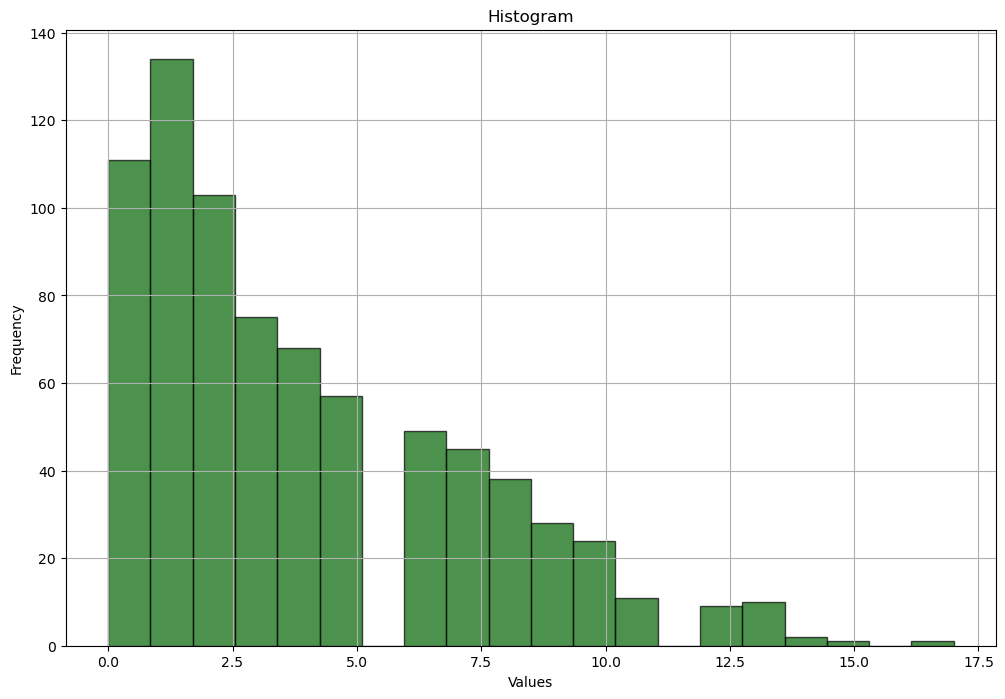

In [126]:
plt.figure(figsize=(12, 8))
plt.hist(data.Pregnancies, bins=20, color='darkgreen', edgecolor='black', alpha=0.7)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The following code displays the distributions of our six major features. Pay particular attention to the measures of central tendency relative to the skewness of the graphs. Some graphs may reveal potential clusters of categories, while others exhibit strong skewness.

We aim to strike a balance between using the median and mean: the median will be favored in cases of skewness, even if the mode is prominent. This decision is made for simplicity's sake. A more comprehensive EDA in the future may involve outlier detection, especially for features such as SkinThickness and Insulin.

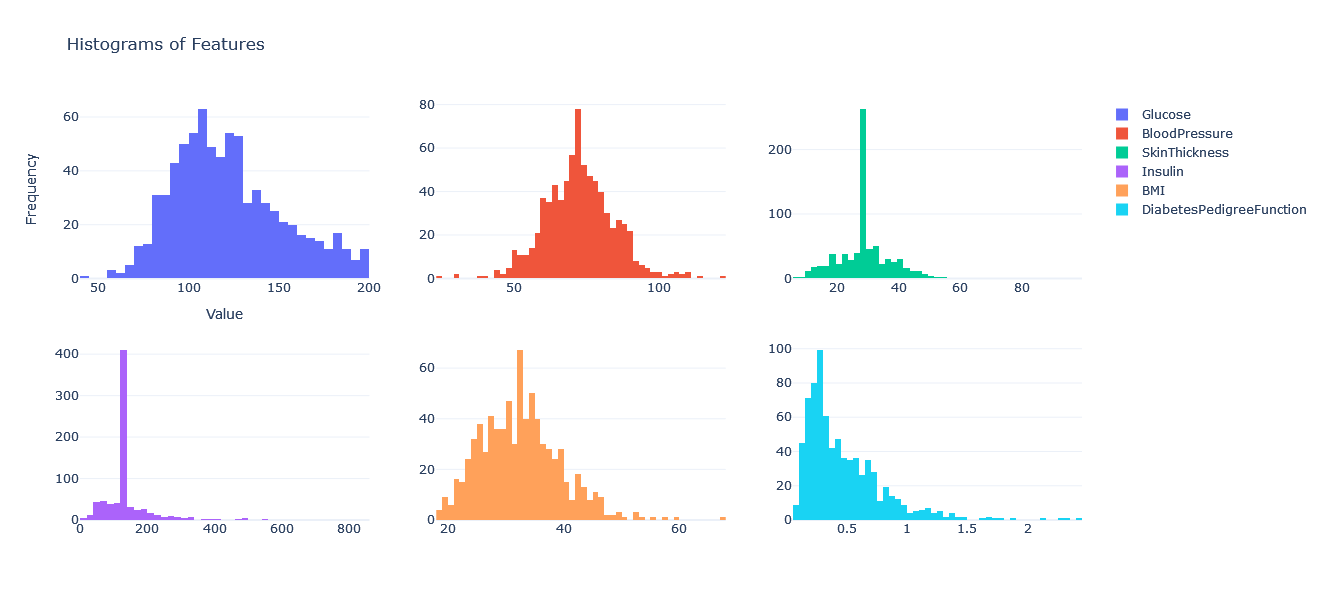

In [128]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Create subplots with three histograms per row
rows = (len(features) + 2) // 3  # Calculate number of rows needed
fig = make_subplots(rows=rows, cols=3)

for i, feature in enumerate(features, start=1):
    histogram = go.Histogram(x=data[feature], name=feature)
    fig.add_trace(histogram, row=(i - 1) // 3 + 1, col=(i - 1) % 3 + 1)

fig.update_layout(
    title="Histograms of Features",
    xaxis=dict(title="Value"),
    yaxis=dict(title="Frequency"),
    template="plotly_white",
    height=rows * 300,
    width=900,
)

fig.show()

In [28]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)
data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].median(), inplace = True)
display(data.head(10))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.000000,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.000000,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.000000,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.000000,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.000000,29.0,125.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.000000,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,72.405184,29.0,125.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.000000,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.000000,29.0,125.0,32.3,0.232,54.0,1.0


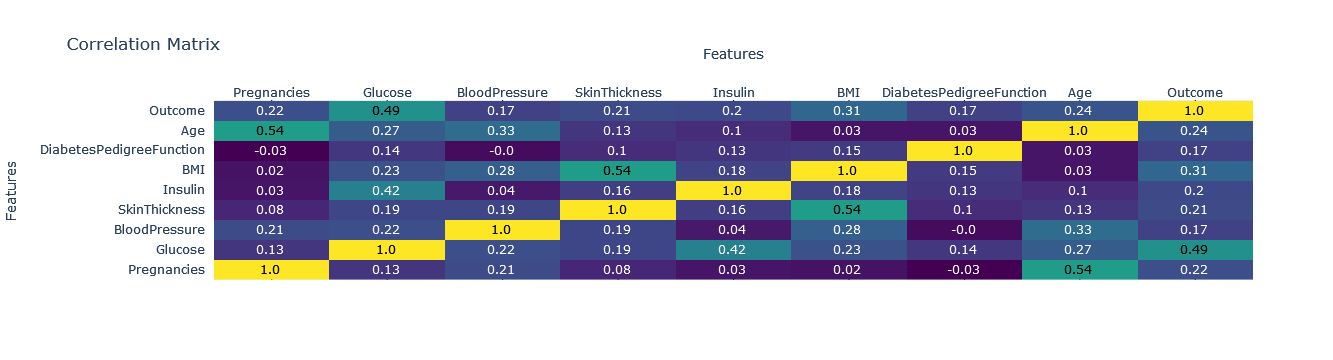

In [130]:
# Calculate correlation matrix
corr_matrix = data.corr()
corr_values_formatted = np.round(corr_matrix.values, decimals=2)

fig = ff.create_annotated_heatmap(z=corr_values_formatted,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis')
fig.update_layout(title='Correlation Matrix', xaxis_title='Features', yaxis_title='Features')
fig.show()

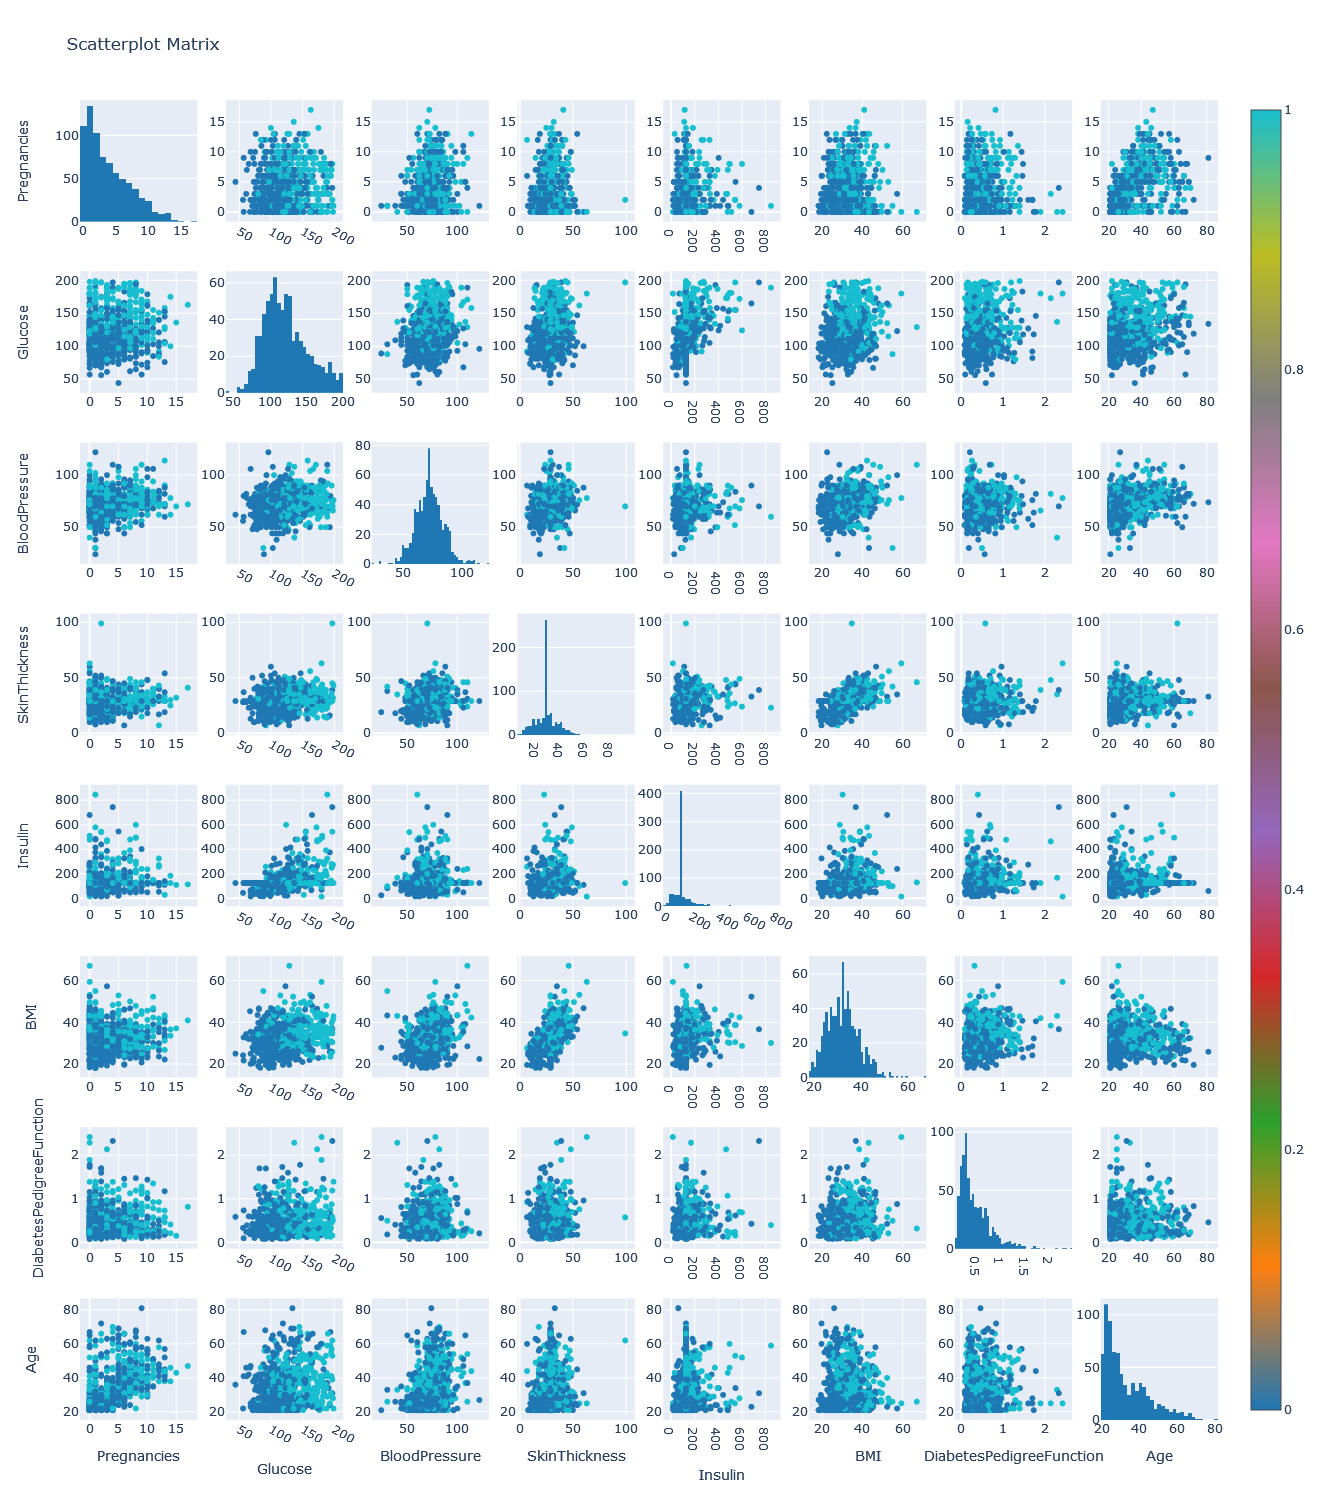

In [132]:
fig = ff.create_scatterplotmatrix(data, diag='histogram', index='Outcome', height=1500, width=1500)
fig.update_layout(showlegend=False)
fig.show()

Some features in the dataset may exhibit stronger relationships with each other compared to their relationship with the outcome variable. While addressing this through feature engineering is an option, a pragmatic approach might involve running the model initially and subsequently dropping these less informative features.

To proceed with model training effectively, it's essential to scale our data. Scaling ensures that comparisons between features are meaningful and helps mitigate issues related to feature magnitudes or units.

In [34]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

y = data.Outcome

As a standard practice, we split our data into training and testing sets here.

In [36]:
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Logistic Regression Analysis

In this section, I embark on the application of logistic regression to predict the likelihood of diabetes occurrence based on all features extracted from the PIMA diabetes dataset. My approach follows a strategy of starting with a comprehensive model and iteratively refining it for improved performance.

## Objective:

My primary objective is to develop a logistic regression model that accurately classifies individuals as either diabetic or non-diabetic based on the full set of health-related attributes available in the dataset. By leveraging all features initially, I aim to capture the broad range of potential predictors of diabetes occurrence.

## Approach:

    Comprehensive Feature Usage: I employ all available features in the dataset for the logistic regression analysis, adopting a "start big" approach. This allows me to initially consider all potential predictors and their collective impact on diabetes risk.

    Model Construction: Using the complete feature set, I construct a logistic regression model. By incorporating all features, I aim to establish a baseline model that captures the overall predictive power of the dataset.

    Model Evaluation: I rigorously evaluate the performance of my logistic regression model using standard metrics such as accuracy, precision, recall, and F1-score. Through comprehensive evaluation, I gain insights into the model's strengths and weaknesses.

Through the logistic regression analysis, I aim to establish a strong foundation for further model refinement and feature selection. By starting with a comprehensive approach and gradually refining my model, I strive to achieve optimal predictive performance.

In [170]:
# Create a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [172]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.73
Confusion Matrix:
[[140  27]
 [ 42  47]]


Based on the confusion matrix for the logistic regression model:

    True Negative (TN): 140 individuals correctly classified as non-diabetic.
    False Positive (FP): 27 individuals incorrectly classified as diabetic when they were actually non-diabetic.
    False Negative (FN): 42 individuals incorrectly classified as non-diabetic when they were actually diabetic.
    True Positive (TP): 47 individuals correctly classified as diabetic.
    
The accuracy score of 0.73 indicates that the logistic regression model correctly classified approximately 73% of the total instances in the dataset. However, it's important to note that the true positive rate is almost as high as the false negative rate. The accuracy score is likely influenced by the imbalance in the distribution of the sample populations, where more individuals lack diabetes than have it.

In other words, both the distribution of the sample populations and the threshold used by the SKlearn model contribute significantly to the accuracy score.

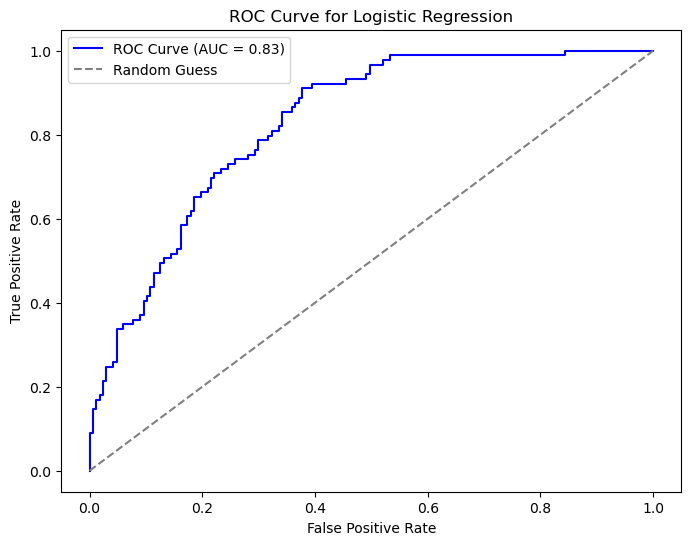

In [174]:

y_prob = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

Notes and Interpretations of the ROC

For the unfamiliar, the ROC curve visually represents the trade-off between the true positive rate and the false positive rate across various threshold values.

    True Positive Rate (TPR): The proportion of actual positive cases correctly classified by the model as positive (diabetic individuals correctly identified).
    False Positive Rate (FPR): The proportion of actual negative cases incorrectly classified by the model as positive (non-diabetic individuals incorrectly identified as diabetic).

A higher AUC score (0.83) indicates that the model exhibits good discriminatory ability, with a strong balance between sensitivity and specificity. The curve lies above the diagonal line (random guessing), suggesting that the model performs significantly better than random chance.

Overall, the logistic regression model demonstrates promising performance in predicting diabetes occurrence, as evidenced by the ROC curve's shape and the high AUC score. However, it is important to note that minimizing the false positive rate dramatically decreases model performance. A pragmatic adjustment of our decision threshold will likely result in significant loss of accuracy just to acquire a lack of false diagnoses.

In [189]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Accuracy:", accuracy)

precision = round(precision_score(y_test, y_pred), 2)
print("Precision:", precision)

recall = round(recall_score(y_test, y_pred), 2)
print("Recall:", recall)

f1 = round(f1_score(y_test, y_pred), 2)
print("F1 Score:", f1)

roc_auc = round(roc_auc_score(y_test, y_pred), 2)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.73
Precision: 0.64
Recall: 0.53
F1 Score: 0.58
ROC AUC Score: 0.68


# Difference in AUC Scores

The logistic regression model demonstrates varying levels of performance depending on the method of evaluation:

    ROC AUC Score (Predicted Probabilities): The model achieves a high AUC score of 0.83, indicating strong discriminatory power across different thresholds. This score suggests promising performance in distinguishing between diabetic and non-diabetic individuals.

    ROC AUC Score (Binary Predictions): In contrast, the AUC score obtained directly from binary predictions is lower at 0.68. This score may underestimate the model's discrimination ability, potentially due to the less nuanced evaluation of class probabilities.

# Model Evaluation Metrics

    Precision: The precision of the model is 0.64, indicating that out of all individuals predicted as diabetic, approximately 64% are truly diabetic.

    Recall: The recall of the model is 0.53, indicating that the model correctly identifies approximately 53% of all diabetic individuals.

    F1 Score: The F1 score of the model is 0.58, which is the harmonic mean of precision and recall.

Overall, while the logistic regression model demonstrates promising discrimination ability based on the high ROC AUC score. However, a low f1 score in context with our other middling scores suggests poor discriminability or suboptimal perfomance. It is very likely that feature engineering will be required to improve this model functionality.

To further demonstrate this requirement, we will implement an SVM model and evaluate its performance. However, it's important to note that without feature engineering, even a more advanced decision model may only show marginal improvement.

# Support Vector Machine (SVM) Analysis

In this section, I create an application of Support Vector Machine (SVM) modeling to predict the likelihood of diabetes occurrence based on the PIMA diabetes dataset. Similar to my previous analysis with logistic regression, my approach aims to comprehensively evaluate the SVM model's performance and identify potential areas for improvement.

### Objective:
My primary objective is to explore the effectiveness of Support Vector Machine (SVM) modeling in classifying individuals as either diabetic or non-diabetic based on the provided health-related attributes. By leveraging the SVM algorithm, I seek to complement and compare its performance with the previously analyzed logistic regression model.

### Approach:
1. **Model Construction:** Using the preprocessed dataset, I will construct an SVM model to predict diabetes occurrence. We will perform a grid search for optimal kernel functions (e.g., linear, polynomial, radial basis function) and tune hyperparameters to optimize model performance.

2. **Model Evaluation:** I will rigorously evaluate the SVM model's performance using various metrics, including accuracy, precision, recall, F1 score, and ROC AUC score. This comprehensive evaluation will provide insights into the model's strengths and weaknesses.

3. **Comparison with Logistic Regression:** Finally, I will compare the performance of the SVM model with that of the previously analyzed logistic regression model. This comparison will help us assess the relative effectiveness of different machine learning algorithms in predicting diabetes occurrence and identify areas for further improvement.

Through this SVM analysis, we aim to gain a deeper understanding of the dataset and the predictive power of SVM modeling in the context of diabetes prediction.


In [195]:
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

As one can see, we will begin with a simple implementation of SK learn's basic SVM.

In [203]:
svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_classifier.predict(X_test_svm)

In [205]:
accuracy = round(accuracy_score(y_test_svm, y_pred_svm), 2)
print("Accuracy:", accuracy)

precision = round(precision_score(y_test_svm, y_pred_svm), 2)
print("Precision:", precision)

recall = round(recall_score(y_test_svm, y_pred_svm), 2)
print("Recall:", recall)

f1 = round(f1_score(y_test_svm, y_pred_svm), 2)
print("F1 Score:", f1)

roc_auc = round(roc_auc_score(y_test_svm, y_pred_svm), 2)
print("ROC AUC Score:", roc_auc)

conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.73
Precision: 0.65
Recall: 0.51
F1 Score: 0.57
ROC AUC Score: 0.68
Confusion Matrix:
[[143  24]
 [ 44  45]]


The absence of extensive feature engineering may have contributed to the similar performance observed in both the SVM and logistic regression models. While no comprehensive feature engineering was conducted, light feature engineering was performed by imputing missing values, which could have mitigated some data quality issues.

Imputation of missing values ensures that valuable information is retained and utilized during model training, thereby preventing potential biases or inaccuracies that may arise from excluding incomplete data points. By imputing missing values, the models were able to leverage additional information from the dataset, potentially enhancing their predictive power.

However, despite this light feature engineering effort, the models may still be limited by the inherent characteristics of the dataset and the complexity of the underlying relationships between features and the target variable. More advanced feature engineering techniques, such as feature selection, transformation, or creation, could further enhance the models' performance by capturing additional patterns and nuances in the data.

In summary, while light feature engineering through imputation of missing values may have contributed to the observed performance of the SVM and logistic regression models, more extensive feature engineering efforts could potentially yield further improvements in model accuracy and generalization.


To further optimize the performance of my Support Vector Machine (SVM) model and assess its sensitivity to parameter variations, I will employ scikit-learn's GridSearchCV module. GridSearchCV allows us to systematically search through a grid of hyperparameters and evaluate the model's performance using cross-validation.

### GridSearchCV for Hyperparameter Tuning

1. **Parameter Grid Definition:** I will define a parameter grid specifying the range of values for key hyperparameters such as the choice of kernel, regularization parameter (C), and kernel coefficient (gamma). By specifying different combinations of these hyperparameters, GridSearchCV will systematically explore the parameter space to identify the optimal configuration.

2. **GridSearchCV Execution:** GridSearchCV will then execute the specified parameter grid search, training and evaluating the SVM model for each parameter combination using cross-validation. It will identify the combination of hyperparameters that maximizes the chosen evaluation metric, such as accuracy or ROC AUC score.

3. **Model Evaluation:** Finally, I will evaluate the performance of the SVM model using the optimal hyperparameters identified by GridSearchCV. I will compare the model's performance metrics, such as accuracy, precision, recall, F1 score, and ROC AUC score, with those obtained from the initial model configuration.

### Assessing the Impact

By systematically exploring the hyperparameter space and selecting the optimal configuration using GridSearchCV, I aim to assess whether fine-tuning the model's hyperparameters leads to improvements in performance. I will compare the performance metrics obtained from the tuned SVM model with those of the initial model configuration to determine the impact of hyperparameter optimization on model accuracy and generalization.

In [233]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
svm_classifier_Grid = SVC()
grid_search = GridSearchCV(svm_classifier_Grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [235]:
svm_classifier_bestparams = SVC(kernel='rbf', gamma=0.001, C=10)
svm_classifier_bestparams.fit(X_train_svm, y_train_svm)
y_pred_svm_bestparams = svm_classifier_bestparams.predict(X_test_svm)


In [227]:
accuracy = round(accuracy_score(y_test_svm, y_pred_svm_bestparams), 2)
print("Accuracy:", accuracy)

precision = round(precision_score(y_test_svm, y_pred_svm_bestparams), 2)
print("Precision:", precision)

recall = round(recall_score(y_test_svm, y_pred_svm_bestparams), 2)
print("Recall:", recall)

f1 = round(f1_score(y_test_svm, y_pred_svm_bestparams), 2)
print("F1 Score:", f1)

roc_auc = round(roc_auc_score(y_test_svm, y_pred_svm_bestparams), 2)
print("ROC AUC Score:", roc_auc)

conf_matrix = confusion_matrix(y_test_svm, y_pred_svm_bestparams)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.74
Precision: 0.67
Recall: 0.51
F1 Score: 0.58
ROC AUC Score: 0.69
Confusion Matrix:
[[145  22]
 [ 44  45]]


While the tuned Support Vector Machine (SVM) model exhibits a slight improvement in performance compared to the initial implementation, with an accuracy of 0.74 and an ROC AUC score of 0.69, the overall impact remains modest. The precision, recall, and F1 score metrics show marginal changes, with precision increasing to 0.67 and recall remaining at 0.51, resulting in an F1 score of 0.58.

Despite fine-tuning the model's hyperparameters through GridSearchCV, the Confusion Matrix continues to display a similar pattern, indicating limited improvement in distinguishing between true positives, true negatives, false positives, and false negatives.

### Need for Feature Engineering

The marginal improvement observed in the model metrics underscores the importance of feature engineering in enhancing the predictive power of the SVM model. While hyperparameter tuning can optimize the model's parameters, feature engineering focuses on transforming and selecting relevant features to capture the underlying patterns and relationships in the data more effectively.

### Next Steps

To address the limitations of the current model, it would likely be prudent to consider dropping features or performing additional feature engineering steps. In order to demonstrate this point, let's return to an earlier graph.

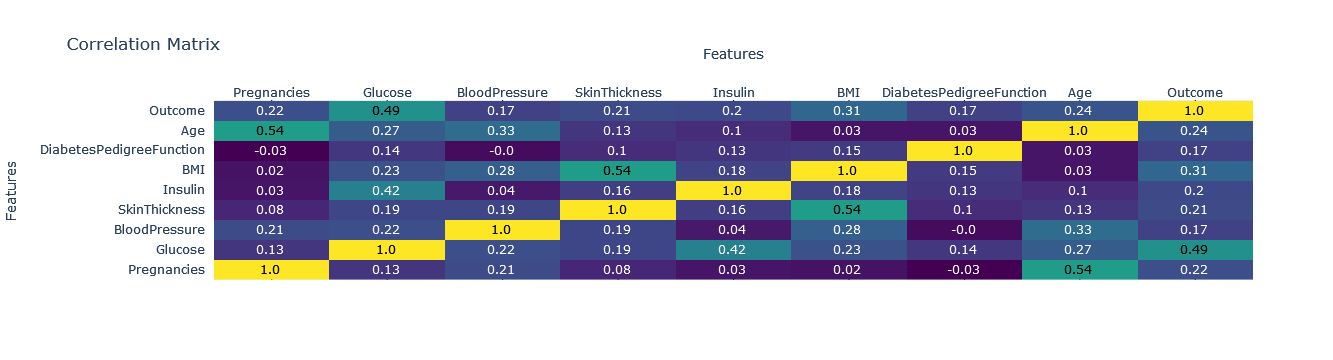

In [231]:
# Calculate correlation matrix
corr_matrix = data.corr()
corr_values_formatted = np.round(corr_matrix.values, decimals=2)

fig = ff.create_annotated_heatmap(z=corr_values_formatted,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis')
fig.update_layout(title='Correlation Matrix', xaxis_title='Features', yaxis_title='Features')
fig.show()

#### Features with High Correlation:

1. **Glucose and Insulin:** These features exhibit a moderate positive correlation with a coefficient of 0.54. Both glucose and insulin levels are relevant to diabetes, and their correlation suggests that they may capture similar information. Therefore, considering dropping one of these features could help mitigate redundancy.

2. **Age and Pregnancies:** Age and the number of pregnancies also demonstrate a moderate positive correlation with a coefficient of 0.54. While not directly related, this correlation may stem from the fact that older individuals are more likely to have had more pregnancies. Dropping one of these features could help reduce redundancy in the model.

3. **BMI and Skin Thickness:** BMI (Body Mass Index) and skin thickness display a moderate positive correlation with a coefficient of 0.54. Both BMI and skin thickness are indicators of body composition and may capture overlapping information related to adiposity. Consider dropping one of these features to improve model interpretability.

Clearly, these models could underperform due to a high level of multicollinearity between features. Let's rerun our last model with a reduced feature set.

In [254]:
scaler = StandardScaler()

selected_columns = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_scaled = scaler.fit_transform(data[selected_columns])

X = pd.DataFrame(X_scaled, columns=selected_columns)

y = data["Outcome"]

In [256]:
X_train_svm_s,X_test_svm_s,y_train_svm_s,y_test_svm_s = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [258]:
svm_classifier_bestparams = SVC(kernel='rbf', gamma=0.001, C=10)
svm_classifier_bestparams.fit(X_train_svm_s, y_train_svm_s)
y_pred_svm_bestparams = svm_classifier_bestparams.predict(X_test_svm_s)


In [260]:
accuracy = round(accuracy_score(y_test_svm_s, y_pred_svm_bestparams), 2)
print("Accuracy:", accuracy)

precision = round(precision_score(y_test_svm_s, y_pred_svm_bestparams), 2)
print("Precision:", precision)

recall = round(recall_score(y_test_svm_s, y_pred_svm_bestparams), 2)
print("Recall:", recall)

f1 = round(f1_score(y_test_svm_s, y_pred_svm_bestparams), 2)
print("F1 Score:", f1)

roc_auc = round(roc_auc_score(y_test_svm_s, y_pred_svm_bestparams), 2)
print("ROC AUC Score:", roc_auc)

conf_matrix = confusion_matrix(y_test_svm_s, y_pred_svm_bestparams)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.77
Precision: 0.74
Recall: 0.52
F1 Score: 0.61
ROC AUC Score: 0.71
Confusion Matrix:
[[151  16]
 [ 43  46]]


### Promising Improvement Through Feature Selection

The evaluation metrics obtained after feature selection demonstrate a promising marginal improvement in the performance of the predictive model. With the selected features ('Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'), the model achieved the following metrics:

- **Accuracy:** The accuracy increased to 0.77, indicating a higher proportion of correctly classified instances compared to previous implementations.
- **Precision:** Precision also showed improvement, reaching 0.74, which indicates a higher proportion of true positive predictions among all positive predictions.
- **Recall:** While recall remained relatively stable at 0.52, it signifies the proportion of true positive predictions captured among all actual positive instances.
- **F1 Score:** The F1 score improved to 0.61, which is the harmonic mean of precision and recall, indicating a better balance between precision and recall.
- **ROC AUC Score:** The ROC AUC score increased to 0.71, suggesting enhanced discriminatory power in distinguishing between positive and negative instances.

### Implications and Suggestions

The marginal improvement observed in model performance after feature selection underscores the importance of thoughtful feature engineering in enhancing model efficacy. While dropping redundant features contributed to the improvement, there remains ample opportunity for additional feature engineering to further boost model performance.

### Recommendations for Further Feature Engineering

1. **Feature Creation:** Explore the possibility of creating new features derived from existing ones, such as interaction terms or derived variables. For example, combining glucose and insulin levels to create an insulin resistance index could provide valuable predictive information.

2. **Feature Transformation:** Consider applying transformation techniques, such as polynomial features or logarithmic transformations, to capture nonlinear relationships between features and the target variable more effectively.

3. **Feature Selection Refinement:** Continuously assess the relevance and contribution of each feature to the predictive task. Refine feature selection methods to identify the most informative subset of features while minimizing redundancy and overfitting.

By investing in additional feature engineering efforts, we aim to further enhance the predictive power and generalization capability of the model, ultimately improving its utility in predicting diabetes occurrence based on the PIMA diabetes dataset.
